In [1]:
from whisperweranalysis.structure import LJSpeech, Predicted_MOS, LenRTF
from whisperweranalysis.groundtruth import lj_valid, rtf_list_gpt2, lj_valid_cleaned_for_transcriptions
from whisperweranalysis.wer import compute

In [2]:
from whisperweranalysis.mel_utilities import audio2mel

In [3]:
# audio2mel()

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import seaborn as sns
import numpy as np

In [6]:
lens = np.array([len(x.split()) for x in rtf_list_gpt2])
np.max(lens), np.min(lens), np.mean(lens), np.std(lens)

(273, 5, 110.61111111111111, 67.75850818973781)

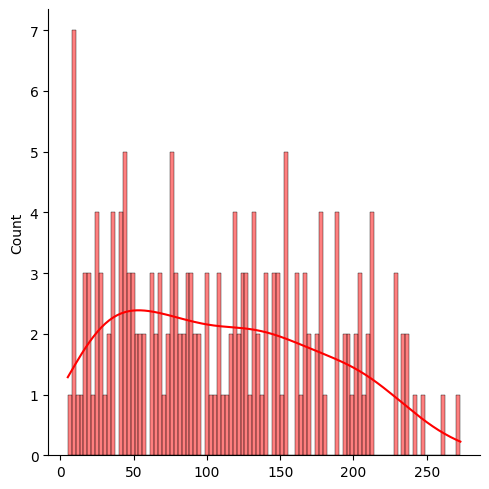

In [7]:
sns.displot(lens, bins=100, kde=True, color="red", )

In [8]:
GT_Mel = LJSpeech.load_from_dir('../whisperweranalysis/transcription/VOC/2')

In [9]:
compute(lj_valid_cleaned_for_transcriptions, GT_Mel.transcriptions)

1.968019680196802

## Plotting time

In [10]:
from collections import defaultdict
from pathlib import Path
from whisperweranalysis.checkpoint_mover import get_list_iter

In [11]:
TRANS_DIR = Path('../whisperweranalysis/transcription')

all_systems = defaultdict(lambda: defaultdict(int))
for system in TRANS_DIR.glob('*'):
    for iter_ in sorted(list(system.glob('*')), key=lambda x: int(x.name)):
        lj_struct = LJSpeech.load_from_dir(iter_)
        # if system != 'VOC':
        #     lj_struct.compute_wer(lj_valid)
        # else:
        lj_struct.compute_wer(lj_valid_cleaned_for_transcriptions)

        all_systems[system.name][int(iter_.name)] = lj_struct.wer
        # if int(iter_.name) > 50000:
        #     break
        
# all_systems['VOC_500'] = { x: list(all_systems['VOC'].values())[0] for x in all_systems['Tacotron2_500']}

In [12]:
all_systems.keys()

dict_keys(['VOC', 'FS2', 'GRAD', 'GCFM4', 'MATCHA', 'VITS'])

In [13]:

systems = {
    'MATCHA': all_systems['MATCHA'],
    'GRAD': all_systems['GRAD'],
    'VOC': all_systems['VOC'],
    'VITS': all_systems['VITS'],
    'FS2': all_systems['FS2'],
    'GCFM4': all_systems['GCFM4'],
}

y_values, legend_labels = [], []
for model in systems:
    y_values.append([v for k, v in systems[model].items() if k <= 100000])
    legend_labels.append(model)
    


In [14]:
all_systems.keys()

dict_keys(['VOC', 'FS2', 'GRAD', 'GCFM4', 'MATCHA', 'VITS'])

In [15]:
all_systems

defaultdict(<function __main__.<lambda>()>,
            {'VOC': defaultdict(int,
                         {2: 1.968019680196802,
                          4: 1.968019680196802,
                          10: 1.968019680196802}),
             'FS2': defaultdict(int,
                         {2: 4.182041820418204,
                          4: 4.182041820418204,
                          10: 4.182041820418204}),
             'GRAD': defaultdict(int,
                         {2: 3.8130381303813037,
                          4: 3.6900369003690034,
                          10: 3.4440344403444034}),
             'GCFM4': defaultdict(int,
                         {2: 2.706027060270603,
                          4: 2.706027060270603,
                          10: 2.706027060270603}),
             'MATCHA': defaultdict(int,
                         {2: 2.337023370233702,
                          4: 2.1525215252152523,
                          10: 2.091020910209102}),
             'VITS': defau

In [16]:
len(y_values), len(y_values[0]), y_values

(6,
 3,
 [[2.337023370233702, 2.1525215252152523, 2.091020910209102],
  [3.8130381303813037, 3.6900369003690034, 3.4440344403444034],
  [1.968019680196802, 1.968019680196802, 1.968019680196802],
  [2.5215252152521526, 2.5215252152521526, 2.5215252152521526],
  [4.182041820418204, 4.182041820418204, 4.182041820418204],
  [2.706027060270603, 2.706027060270603, 2.706027060270603]])

/home/smehta/Projects/whisper-analysis-plots/whisperweranalysis/plotting/line.py:249: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(ylim)


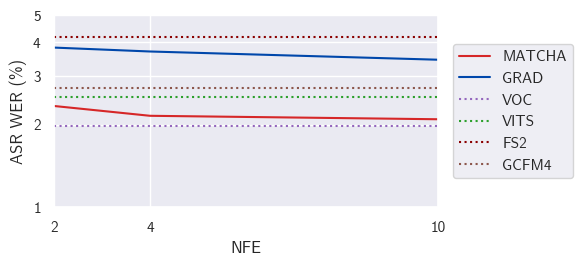

In [17]:
from whisperweranalysis.plotting.line import plot_lines
import matplotlib.pyplot as plt

x = sorted([2, 4, 10])

x_ticks = [2, 4, 10] 
x_tick_labels = list(map(str, x_ticks))
y_ticks = [1, 2, 3, 4, 5] #, 25, 50, 100]
y_tick_labels = list(map(str, y_ticks)) 
plot_colors = ['#d62728', '#0047AB','#9467bd', '#2ca02c', '#8b0000', '#8c564b', '#17becf'] #, '#d62728', '#0047AB', '#2ca02c', ]
line_format = ['-', '-', ':', ':', ':', ':' ,'-', '-'] # '--', '--', '--']
aspect_ratio = (2, 1)
output_filename = 'asr_nfe.pdf'
plot_log_x = False
plot_log_y = True
xlim = (2, 10)
# with plt.xkcd():
plot_lines([x], y_values, 
            x_label='NFE',
            y_label='ASR WER (%)', 
            legend_label=legend_labels,
            line_format=line_format,
            plot_colors=plot_colors,
            aspect_ratio=aspect_ratio,
            x_ticks=x_ticks,
            x_tick_labels=x_tick_labels,
            y_ticks=y_ticks,
            y_tick_labels=y_tick_labels,
            file_name=output_filename,
            plot_log_x=plot_log_x,
            plot_log_y=plot_log_y,
            xlim=xlim,
    )

## Predicted MOS plot

In [18]:
WAVEFORM_PATH = Path('../whisperweranalysis/waveforms_ICASSP24')

In [19]:
all_systems = defaultdict(lambda: defaultdict(int))
for system in WAVEFORM_PATH.glob('*'):
    for iter_ in sorted(list(system.glob('*')), key=lambda x: int(x.name)):
        predicted_mos = Predicted_MOS.load_from_dir(iter_)
        all_systems[system.name][int(iter_.name)] = predicted_mos 

FileNotFoundError: [Errno 2] No such file or directory: '../whisperweranalysis/waveforms_ICASSP24/GCFM/4/predicted_mos.json'

In [24]:
all_systems['VOC'].values()

dict_values([Predicted_MOS(model_name=VOC, iterations=1, mean=4.613, std=0.122, min=4.263, max=4.838, median=4.625, mode=4.448, count=98), Predicted_MOS(model_name=VOC, iterations=2, mean=4.613, std=0.122, min=4.263, max=4.838, median=4.625, mode=4.448, count=98), Predicted_MOS(model_name=VOC, iterations=3, mean=4.613, std=0.122, min=4.263, max=4.838, median=4.625, mode=4.448, count=98), Predicted_MOS(model_name=VOC, iterations=4, mean=4.613, std=0.122, min=4.263, max=4.838, median=4.625, mode=4.448, count=98), Predicted_MOS(model_name=VOC, iterations=5, mean=4.613, std=0.122, min=4.263, max=4.838, median=4.625, mode=4.448, count=98), Predicted_MOS(model_name=VOC, iterations=10, mean=4.613, std=0.122, min=4.263, max=4.838, median=4.625, mode=4.448, count=98), Predicted_MOS(model_name=VOC, iterations=25, mean=4.613, std=0.122, min=4.263, max=4.838, median=4.625, mode=4.448, count=98), Predicted_MOS(model_name=VOC, iterations=50, mean=4.613, std=0.122, min=4.263, max=4.838, median=4.625,

In [25]:

systems = {
    'MATCHA': all_systems['MATCHA'],
    'GRAD': all_systems['GRAD'],
    'VOC': all_systems['VOC'],
    'VITS': all_systems['VITS'],
    'FS2': all_systems['FS2'],
}

y_values, legend_labels = [], []
for model in systems:
    per_nfe = []
    for k, v in systems[model].items():
        per_nfe.append(list(v.predicted_mos.values()))
    y_values.append(per_nfe)
    legend_labels.append(model)
    


In [26]:
systems

{'MATCHA': defaultdict(int,
             {2: Predicted_MOS(model_name=MATCHA, iterations=2, mean=4.623, std=0.145, min=3.763, max=4.901, median=4.652, mode=4.743, count=98),
              4: Predicted_MOS(model_name=MATCHA, iterations=4, mean=4.646, std=0.115, min=4.156, max=4.901, median=4.674, mode=4.755, count=98),
              10: Predicted_MOS(model_name=MATCHA, iterations=10, mean=4.638, std=0.137, min=3.854, max=4.894, median=4.667, mode=4.724, count=98)}),
 'GRAD': defaultdict(int,
             {4: Predicted_MOS(model_name=GRAD, iterations=4, mean=4.319, std=0.207, min=3.827, max=4.666, median=4.357, mode=4.434, count=98),
              50: Predicted_MOS(model_name=GRAD, iterations=50, mean=4.584, std=0.120, min=4.224, max=4.803, median=4.613, mode=4.596, count=98)}),
 'VOC': defaultdict(int,
             {1: Predicted_MOS(model_name=VOC, iterations=1, mean=4.613, std=0.122, min=4.263, max=4.838, median=4.625, mode=4.448, count=98),
              2: Predicted_MOS(model_name=VO

ValueError: x and y must have same first dimension, but have shapes (4,) and (3,)

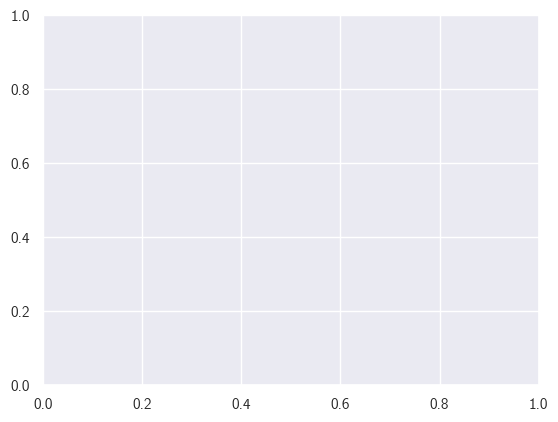

In [28]:
from whisperweranalysis.plotting.line import plot_lines_with_confidence_intervals
import matplotlib.pyplot as plt
x = sorted([2, 4, 10, 50])
x_ticks = x
x_tick_labels = [str(i) for i in x] 
y_ticks = [3.5, 4, 4.5, 5] #, 25, 50, 100]
y_tick_labels = [str(i) for i in y_ticks]
plot_colors = ['#d62728', '#0047AB','#9467bd', '#2ca02c', '#8b0000', '#8c564b', '#17becf'] #, '#d62728', '#0047AB', '#2ca02c', ]
line_format = ['-', '-', '-', '-', ':', '-', '-'] # '--', '--', '--']
aspect_ratio = (2, 1)
output_filename = 'mos_nfe.pdf'
plot_log_x = True
plot_log_y = True
xlim = (0, 100)
# with plt.xkcd():
plot_lines_with_confidence_intervals([x], y_values, 
            x_label='NFE',
            y_label='Predicted MOS', 
            legend_label=legend_labels,
            line_format=line_format,
            plot_colors=plot_colors,
            aspect_ratio=aspect_ratio,
            x_ticks=x_ticks,
            x_tick_labels=x_tick_labels,
            y_ticks=y_ticks,
            y_tick_labels=y_tick_labels,
            file_name=output_filename,
            plot_log_x=plot_log_x,
            plot_log_y=plot_log_y,
            xlim=xlim,
            plot_confidence=False,
    )

# Speed comparison plots

In [11]:
SPEED_COMPARISON_DIR=Path('../whisperweranalysis/speed_comparison')

models = [
    'FS2',
    # 'VITS',
    # 'GRAD_1',
    'GRAD-10',
    'GRAD-4',
    'GCFM-4',
    # 'GRAD_50',
    'MAT-10',
    'MAT-4',
    'MAT-2',
    # 'MATCHA_50',
]

len_rtfs= []
for model in models:
    len_rtfs.append(LenRTF.from_json(SPEED_COMPARISON_DIR/f'{model}.json'))

In [12]:
len_rtfs

[LenRTF(FS2: len=167, mean±std=0.090±0.191, min:0.016, max=2.590),
 LenRTF(GRAD-10: len=167, mean±std=0.831±0.442, min:0.146, max=2.055),
 LenRTF(GRAD-4: len=167, mean±std=0.273±0.146, min:0.067, max=0.978),
 LenRTF(GCFM-4: len=70, mean±std=0.131±0.033, min:0.055, max=0.198),
 LenRTF(MAT-10: len=167, mean±std=0.217±0.092, min:0.140, max=0.741),
 LenRTF(MAT-4: len=167, mean±std=0.091±0.020, min:0.067, max=0.185),
 LenRTF(MAT-2: len=167, mean±std=0.068±0.036, min:0.042, max=0.326)]

In [13]:
xs = []
ys = []
for x in len_rtfs:
    x_per_file = []
    y_per_file = []
    for key, value in x.data.items():
        for v in value:
            x_per_file.append(int(key))
            y_per_file.append(v)
    xs.append(x_per_file)
    ys.append(y_per_file)


In [14]:
len(xs), len(xs[0]), xs[0][0]

(7, 180, 1058)

/home/smehta/Projects/whisper-analysis-plots/whisperweranalysis/plotting/scatter.py:245: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(ylim)


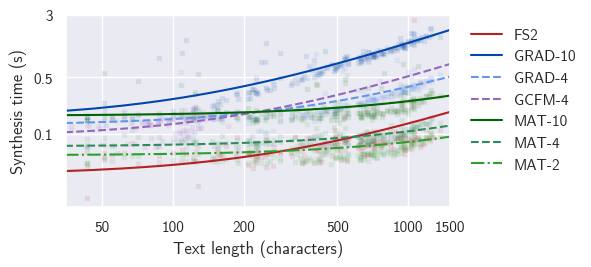

In [15]:
from whisperweranalysis.plotting.scatter import plot_scatter_from_list_of_dict
import matplotlib.pyplot as plt


x_ticks = [10, 20, 50, 100, 200, 500, 1000, 1500]
x_tick_labels = list(map(str, x_ticks))
y_ticks = [0.1, 0.5, 3]
y_tick_labels = list(map(str, y_ticks))
# plot_colors = ['#d62728', '#0047AB','#9467bd', '#2ca02c', '#8b0000', '#8c564b',  '#7f7f7f', '#bcbd22','#e377c2', '#17becf']
# plot_colors = ['#9467bd', '#0047AB', '#0047AB', '#8c564b', '#2ca02c', '#2ca02c', '#2ca02c',  '#2ca02c', '#bcbd22','#e377c2', '#17becf']
# plot_colors = ['#8c564b', '#0047AB', 'cornflowerblue', '#9467bd', '#2ca02c', 'darkgreen', 'seagreen']
plot_colors = ['firebrick', '#0047AB', 'cornflowerblue', '#9467bd', 'darkgreen', 'seagreen', '#2ca02c']

# ('.', 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
markers = ['X'] * 10

aspect_ratio = (10, 5)
output_filename = 'time_vs_txtlength.pdf'
plot_log_x = True
plot_log_y = True
xlim = (35, 1500)
ylim = (0, 3)
radius=12
alpha=0.07
linestyle=['-', '-', '--', '--', '-', '--', '-.']
# with plt.xkcd():

plot_scatter_from_list_of_dict(
        xs, ys, 
        x_label='Text length (characters)',
        y_label='Synthesis time (s)',
        legend_label=models,
        markers=markers,
        plot_colors=plot_colors,
        aspect_ratio=aspect_ratio,
        x_ticks=x_ticks,
        x_tick_labels=x_tick_labels,
        y_ticks=y_ticks,
        y_tick_labels=y_tick_labels,
        file_name=output_filename,
        plot_log_x=plot_log_x,
        plot_log_y=plot_log_y,
        xlim=xlim,
        ylim=ylim,
        plot_confidence=False,
        radius=radius,
        alpha=alpha,
        linestyle=linestyle,
)

# TTSG

In [49]:
TRANS_DIR = Path('../whisperweranalysis/transcription_TTSG')

all_systems = defaultdict(lambda: defaultdict(int))
for system in TRANS_DIR.glob('*'):
    for iter_ in sorted(list(system.glob('*')), key=lambda x: int(x.name)):
        lj_struct = LJSpeech.load_from_dir(iter_)
        # if system != 'VOC':
        #     lj_struct.compute_wer(lj_valid)
        # else:
        lj_struct.compute_wer(lj_valid_cleaned_for_transcriptions)

        all_systems[system.name][int(iter_.name)] = lj_struct.wer
        # if int(iter_.name) > 50000:
        #     break
        
# all_systems['VOC_500'] = { x: list(all_systems['VOC'].values())[0] for x in all_systems['Tacotron2_500']}

In [50]:
all_systems

defaultdict(<function __main__.<lambda>()>,
            {'DTTSG': defaultdict(int, {50: 12.423124231242312}),
             'MAT': defaultdict(int,
                         {50: 8.979089790897909, 500: 8.856088560885608}),
             'SM': defaultdict(int,
                         {50: 11.746617466174662, 500: 10.39360393603936})})